<a href="https://colab.research.google.com/github/Intruz01/KoronaScience/blob/master/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## IMPORT LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython import display
from ipywidgets import interact, widgets

In [0]:
## READ DATA FOR CASES, DEATH and RECOVERIES

df_confirmed_cases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [0]:
def clean_data(df_raw):
  df_cleaned = df_raw.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_name='Cases', var_name='Date')
  df_cleaned = df_cleaned.set_index(['Country/Region', 'Province/State', 'Date'])
  return df_cleaned

## CLEAN ALL DAASETS

df_confirmed_cases = clean_data(df_confirmed_cases_raw)
df_deaths = clean_data(df_deaths_raw)
df_recovers = clean_data(df_recoveries_raw)

In [4]:
df_deaths.sample(10)

Lat      Long  Cases
Country/Region   Province/State Date                             
Kenya            NaN            1/31/20  -0.0236   37.9062      0
China            Shandong       3/21/20  36.3427  118.1498      7
                 Chongqing      2/10/20  30.0572  107.8740      2
                 Hebei          3/5/20   39.5490  116.1306      6
Diamond Princess NaN            2/3/20    0.0000    0.0000      0
China            Chongqing      4/10/20  30.0572  107.8740      6
Mauritius        NaN            3/31/20 -20.2000   57.5000      5
Thailand         NaN            3/24/20  15.0000  101.0000      4
Saudi Arabia     NaN            2/11/20  24.0000   45.0000      0
Taiwan*          NaN            3/14/20  23.7000  121.0000      1

In [5]:
df_polska = df_confirmed_cases.loc['Poland']
df_polska.tail(10)

Lat     Long  Cases
Province/State Date                            
NaN            4/3/20   51.9194  19.1451   3383
               4/4/20   51.9194  19.1451   3627
               4/5/20   51.9194  19.1451   4102
               4/6/20   51.9194  19.1451   4413
               4/7/20   51.9194  19.1451   4848
               4/8/20   51.9194  19.1451   5205
               4/9/20   51.9194  19.1451   5575
               4/10/20  51.9194  19.1451   5955
               4/11/20  51.9194  19.1451   6356
               4/12/20  51.9194  19.1451   6674

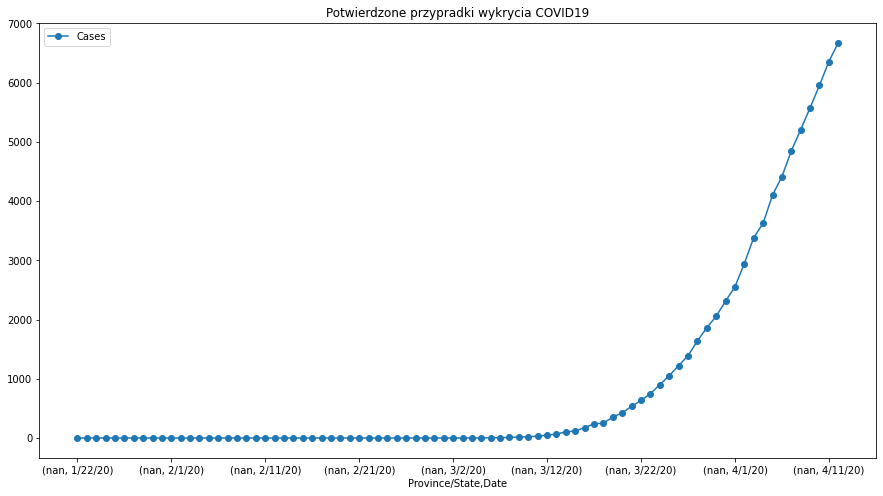

In [6]:
df_polska.plot(y='Cases', figsize=(15, 8), marker='o', title='Potwierdzone przypradki wykrycia COVID19');

In [7]:
df_hubei = df_confirmed_cases.loc['China', 'Hubei']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [0]:
df_poland_and_hubei = df_polska.merge(df_hubei, left_on='Date', right_on='Date')

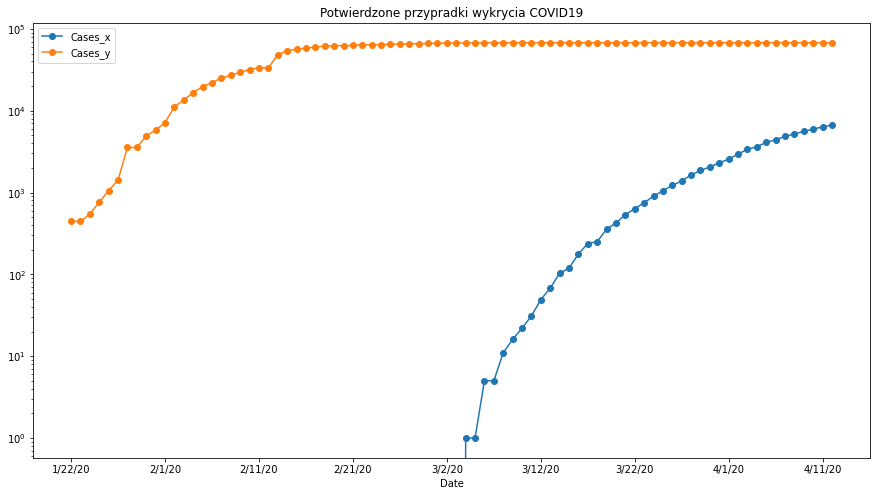

In [9]:
df_poland_and_hubei.plot(y=['Cases_x', 'Cases_y'], figsize=(15, 8), marker='o', title='Potwierdzone przypradki wykrycia COVID19', logy=True);